<a href="https://colab.research.google.com/github/ghaissa/deepL/blob/main/Bienvenue_dans_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import requests
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sys
import datetime
from tensorflow import keras
from tensorflow.keras.models import Model
import tensorflow as tf

%pylab inline

Populating the interactive namespace from numpy and matplotlib


Shape of the image (148757,)


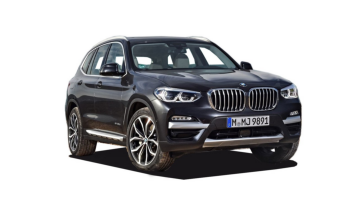

Shape of the image (14601,)


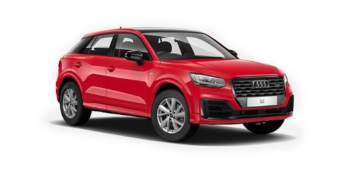

In [3]:
url_pikachu = r'https://github.com/ghaissa/deepL/blob/main/bmw.jpg?raw=true'
resp = requests.get(url_pikachu, stream=True).raw
image_array_pikachu = np.asarray(bytearray(resp.read()), dtype="uint8")
print(f'Shape of the image {image_array_pikachu.shape}')
image_pikachu = cv2.imdecode(image_array_pikachu, cv2.IMREAD_COLOR)
plt.axis('off')
plt.imshow(cv2.cvtColor(image_pikachu, cv2.COLOR_BGR2RGB)) #opencv if BGR color, matplotlib usr RGB so we need to switch otherwise the pikachu will be blue ... O:)
plt.show()


url_pikachu = r'https://github.com/ghaissa/deepL/blob/main/audi.jpg?raw=true'
resp = requests.get(url_pikachu, stream=True).raw
image_array_pikachu = np.asarray(bytearray(resp.read()), dtype="uint8")
print(f'Shape of the image {image_array_pikachu.shape}')
image_pikachu = cv2.imdecode(image_array_pikachu, cv2.IMREAD_COLOR)
plt.axis('off')
plt.imshow(cv2.cvtColor(image_pikachu, cv2.COLOR_BGR2RGB)) #opencv if BGR color, matplotlib usr RGB so we need to switch otherwise the pikachu will be blue ... O:)
plt.show()

In [5]:
image_count = len(list(data_dir.glob('*/*')))
print(image_count)

38


In [6]:
batch_size = 3
img_height = 200
img_width = 200

train_data = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  )

val_data = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = val_data.class_names
print(class_names)

Found 38 files belonging to 2 classes.
Using 31 files for training.
Found 38 files belonging to 2 classes.
Using 7 files for validation.
['audi', 'bmw']


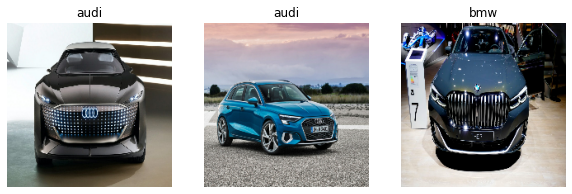

In [7]:
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
  for i in range(3):
    ax = plt.subplot(1, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [10]:
from tensorflow.keras import layers

num_classes = 2

model = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(128,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(16,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'],)

logdir="logs"

tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir,histogram_freq=1, write_images=logdir,
                                                   embeddings_data=train_data)

model.fit( 
  train_data,
  validation_data=val_data,
  epochs=2,
  callbacks=[tensorboard_callback]
)


Epoch 1/2


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


11/11 [==============================] - 11s 905ms/step - loss: 0.7113 - accuracy: 0.5161 - val_loss: 0.7576 - val_accuracy: 0.4286
Epoch 2/2
11/11 [==============================] - 10s 875ms/step - loss: 0.7359 - accuracy: 0.4516 - val_loss: 0.6968 - val_accuracy: 0.5714


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 200, 200, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 197, 197, 128)     6272      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 98, 98, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 95, 95, 64)        131136    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 47, 47, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 44, 44, 32)        3

Saving audi-s8-2019-im-test.jpg to audi-s8-2019-im-test.jpg


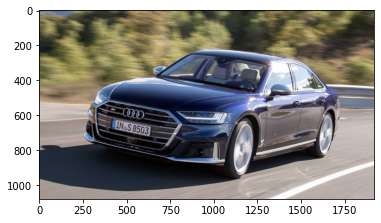

IT'S AN AUDI !


AttributeError: ignored

In [30]:
from google.colab import files
file_to_predict = files.upload()
for file_ in file_to_predict:
    image_to_predict = cv2.imread(file_,cv2.IMREAD_COLOR)
    plt.imshow(cv2.cvtColor(image_to_predict, cv2.COLOR_BGR2RGB))
    plt.show()
    img_to_predict = np.expand_dims(cv2.resize(image_to_predict,(200,200)), axis=0) 
    res = model.predict_classes(img_to_predict)
    print(model.predict_classes(img_to_predict))
    print(model.predict(img_to_predict))
    if res == 1:
        plt.imshow(cv2.cvtColor(image_pikachu, cv2.COLOR_BGR2RGB))
        plt.show()
        print("IT'S AN AUDI !")
    elif res == 0 :
        plt.imshow(cv2.cvtColor(image_rondoudou, cv2.COLOR_BGR2RGB))
        plt.show()
        print("IT'S A BMW !")